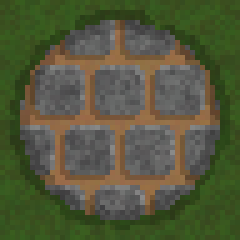

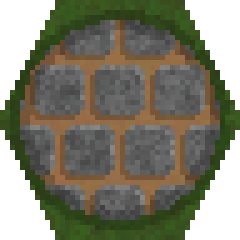

self._layers[0].subtype='full'


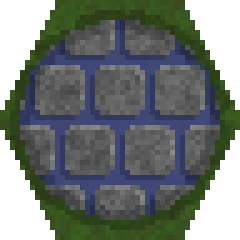

In [5]:
from new_struct.tile import Tile
from new_struct.mask import Mask, ShapeMask, EdgeMask
from new_struct.layer import Layer
from new_struct.shade import Shade
from new_struct.maskgen import MaskGen, ShapeMaskGen, EdgeMaskGen
from new_struct.texture import Texture, TextureGen
from new_struct.utils_img import display_image

S = 48
SIZE = (S, S)
SCALE = 8
FORCE = 1.25

tx1 = TextureGen.named_texture(SIZE, "dirt")
tx2 = TextureGen.named_texture(SIZE, "gravel")
tx3 = TextureGen.named_texture(SIZE, "grass")
tx4 = TextureGen.named_texture(SIZE, "water.shallow")

mk1 = MaskGen.brick_pattern(SIZE, (10, 10), 2, 1).offset((-1, -1), "wrap")
mk2 = MaskGen.blob_draw(SIZE, [((S/2-0.5, S/2-0.5), S/2-4.5)]).invert()
mk3 = ShapeMaskGen.hexagonal(SIZE)

sh1 = Shade(FORCE, (-1, +1), "wrap", inverted=True)
sh2 = Shade(1/FORCE, (-1, +1), "wrap")
sh3 = Shade(1/FORCE, outline=2)
sh4 = Shade(1/FORCE, outline=2, dist=0.5, inverted=True)

tl1 = Tile([
    Layer(tx1),
    Layer(tx2, mk1, sh1, sh2),
    Layer(tx3, mk2, sh4, sh3),
])
display_image(tl1.image, 5)

tl1.set_shape(mk3)
display_image(tl1.image, 5)

tl1.set_base(tx4)
display_image(tl1.image, 5)

In [ ]:


highlight = Shade(FORCE, (-1, +1), "wrap", inverted=True)
shadows = Shade(1/FORCE, (-1, +1), "wrap")
overhead = Shade(1/FORCE, outline=2.5)

bricktop = highlight.stamp(tx2, mk1)
grassbotom = shadows.stamp(tx1, mk1)

final = grassbotom.combine(bricktop, mk1)
final.display(SCALE)

final = overhead.stamp(final, mk2)
final = final.combine(tx3, mk2)
final.display(SCALE)

In [ ]:

tl1 = Tile([
    Layer(tx1),
    Layer(tx2, mk1, Shade(0.8, (-1, +1), "wrap")),
    Layer(tx3, mk2, Shade(1.5, 0, (2, 0.5))),
])
tl1.display(SCALE)

In [ ]:

s1 = ShapeMaskGen.hexagonal((48, 48))
print(f"{s1=}")
# s1.display(4)

m1 = MaskGen.line_draw((48, 48), [((12, 0), (0, 48), 8)])
m1 = m1.merge(m1.reflect('y'))
m1 = m1.merge(m1.rotate(90))
print(f"{m1=}")
# m1.display(4)

t1 = TextureGen.named_texture(48, "grass")
print(f"{t1=}")
# t1.display(4)

t2 = TextureGen.named_texture(48, "stone")
print(f"{t2=}")
# t2.display(4)

t3 = TextureGen.named_texture(48, "water")
print(f"{t3=}")

tl1 = Tile([*t1.overlay(t2, m1), Layer(None, s1)])
print(f"{tl1=}")
tl1.display(4)

In [ ]:
tl1.set_base(t3)
tl1.display(4)

In [ ]:

tx1 = Texture("examples/stone_road_on_grass.png")
# tx1.display(4)
tx2 = Texture("examples/clay_brick_wall.png")

m1 = Mask("tests/samples/masks/curve_NW.png").repeat((48, 48))
# m1.display(4)

l1 = tx1.cutout(m1)
display_image(l1.image, 4)

t1 = tx1.overlay(tx2, m1)
display_image(t1.image, 4)

In [ ]:
from PIL import Image
from jabutiles.utils_img import display_image, get_outline

img = Image.open("tests/samples/addborder.png")
display_image(img)

otl = get_outline(img)
display_image(otl)

In [ ]:
from jabutiles.texture import Texture

t = Texture("examples/stone_road_on_grass.png")
t.display(5)

o = (-10, -20)
t.offset(o, None).display(5)
# t.offset(o, 'wrap').display(5)
t.offset(o, 'bleed').display(5)

In [ ]:
from PIL import ImageFilter, Image, ImageDraw, ImageOps

from jabutiles import Mask, Tile, Texture
from jabutiles.tilegen import TileGen

In [ ]:
mask = TileGen.gen_brick_pattern_mask(12, (10, 10), 2, 1, 0).offset((-1, -1))
mask = mask.invert().outline(1, "white", True, 0.33).invert()
mask.display(4)

(mask
    .repeat(
        (96, 96),
        mirrors=['x', 'y', 'p', 'n'],
        rotations=[0, 90, 180, 270],
    )
).display(4)

In [ ]:
img1 = TileGen.gen_texture_tile((48, 48), "grass").image
img2 = TileGen.gen_texture_tile((48, 48), "stone").image
img3 = TileGen.gen_texture_tile((48, 48), "water").image

img4 = TileGen.gen_brick_pattern_mask(48, 6, 2, 1).image
img5 = TileGen.gen_blobs_mask((48, 48), [((24, 24), (12, 8))]).image
img6 = TileGen.gen_hex_mask((48, 48), "flat").image

text1 = Texture(img1)
text2 = Texture(img2)
text3 = Texture(img3)
mask1 = Mask(img4).offset((-1, 3))
mask2 = Mask(img5).filter(ImageFilter.SMOOTH)
mask3 = Mask(img6, "hex.flat")

mask1.display(5)

final = Tile.merge_tiles(
    (text1, None),  # base
    (text2, mask1), # head
    (text3, mask2), # head
    (None, mask3),  # mask
)
final.display(4)
print(f"{final.shape=}")

In [ ]:
m = Mask(TileGen.gen_brick_pattern_mask((48, 48), (20, 8), (4, 4), 0).image).offset((-2, -2))
m.display(4)
m = m.invert().outline(1, "white", True, 0.2).invert()
m.display(4)
m.take((0, 0), (96, 96)).display(4)